# El concepto de "vanishing" y "exploding" gradient.




## Empalme con la clase anterior

Inicialmente pensamos que la funcion de costo es una funcion de costos locales:

$$ C = \frac{1}{T} \sum_{t=1}^T C_t $$
$T$ es el numero de nodos que convergen para crear $C$.

Como hemos hecho antes, me voy a enfocar en un solo $C_t$.


El gradiente (local) que buscamos (para $h$, para $x$ es mas facil y lo vemos mas adelantte) es
$$\nabla_h C_k = \frac{\partial C_k}{\partial \theta_h} $$

De la regla de la cadena:


$$\frac{\partial C_k}{\partial \theta_h} = \frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial h_t} \frac{\partial h_t}{\partial \theta_h}.  \tag{1a} $$

Nos enfocamos en el tercer factor de la derecha que es el mas complicado. De nuevo la regla de la cadena.

Ver equation (1)
$$ \frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}}  \frac{\partial h_{t-1}}{\partial \theta_h}. \tag{2} $$

La ecuacion (2) es recursiva, de la forma
$$a_t = b_t + c_t a_{t-1} $$
donde

$$a_t = \frac{\partial h}{\partial \theta_h} \quad, \quad b_t = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} \quad , \quad c_t = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}}  $$





Reemplazando:

$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \sum_{i=1}^{t-1}  \frac{\partial f(x_i, h_{i-1}, \theta_x, \theta_h)}{\partial \theta_h}  \prod_{j=i+1}^t \frac{\partial f(x_j, h_{j-1}, \theta_x, \theta_h)}{\partial h_{j-1}} \tag{3}$$


De forma explicita vamos a escribir los argumentos de la funcion $f$,

$$ f(x_t, h_{t-1}, W, \Theta) = f( W x_t + \Theta h_{t-1}) $$

Donde
$$x_t \in \mathbb{R}^n , h_t \in \mathbb{R}^p, W \in \mathbb{R}^{m \times n} , \Theta \in \mathbb{R}^{m \times p}, U \in \mathbb{R}^{q \times p} $$
La notacion que tenemos es
$$(\theta_x, \theta_h, \theta_y) =(W, \Theta, U) $$


En la ecuacion (3) falta lo que esta dentro de la productoria.
Por regla de la cadena

$$\frac{\partial f_r}{\partial (h_{j-1})_s} = \frac{\partial f_r}{\partial \xi_p} \frac{\partial \xi_p}{\partial (h_{j-1})_s} = \frac{\partial f_r}{\partial \xi_p} \Theta_{ik} \delta_{ks} = \frac{\partial f_r}{\partial \xi_p} ( \Theta)_{ps} \tag{1}$$

Ya se tienen todos los elementos para evaluar la ecuacion (3)
con la (3) se evalua la (1a). Este es el gradiente para la componente $k$, luego se suman todos los gradientes locales para hallar $\nabla C$.

Si observamos el final de la ecuacion (1) tenemos que $\Theta$ esta multiplicado $t$ veces en la productoria de la ecuacion (0).
(3). De forma que tenemos un factor de la forma, algo asi como


$$(\Theta)^t $$
para $t \gg 1$ esta matriz puede

* Irse al infinito su $\rho(\Theta) > 1.$ Genera el exploding gradient.
* Irse a 0 si $\rho(\Theta) < 1. $ Vanishing gradient.

Sin embargo esto no es del todo cierto por $\Theta$ no esta aislado
De la ecuacion 1 se tiene que

$$ \frac{\partial f_r}{\partial h_{j-1}}= \frac{\partial f_r}{\partial \xi} \Theta $$
pues $\partial f_r/\partial \xi$ no es necesariamente la indendidad ni necesariamente conmuta con $\Theta$. Sin embargo
el sentido es valido. $\Theta$ esta siendo multiplicado muchas veces y esto puede hacer que el sistema diverja al infinito o converja a 0.

### Metodos para curar el vanishing/exploding gradient

$$\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla_{\theta} C(\theta^{(i)} $$

* Si $\nabla_{\theta}(\theta) \to \infty$ entonces
$\theta \to \infty$
* Si $\nabla_{\theta}(\theta) \to 0$,
entonces $\theta_i \to 0$ y

$$\theta^{(i+1)} \approx \theta^{(i)} $$
el sistema deja de aprender.

* **Gradient clipping**: Se puede poner un umbral para que el gradiente este metido dentro de este umbral. Esto funciona para el caso de exploding gradient.

* **Regularization**: Hay **dropout**, regularizacion con normas $\ell_1$, $\ell_2$.

* **Escoger funciones de activacion apropiadas**: Por ejemplo la ReLU.

* **weight regularization**: Se puede regularizar los pesos con $\| \Theta \|_1$, $\| \Theta \|_2$

* **weight initialization design**: Normalmente los pesos para comenzar $\theta \in \mathcal{N}(0,1)$. Un par de cientificos Xavier Glorot y Yoshua Bengio, desarrollaron el metodo que se llama **Xavier Initialization**

Referencia:

Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep
feedforward neural networks. In Yee Whye Teh and Mike Titterington, editors, Pro-
ceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics,
volume 9 of Proceedings of Machine Learning Research, pages 249–256, Chia Laguna
Resort, Sardinia, Italy, 13–15 May 2010. PMLR.

Ellos encontraron que la **desviacion estandard** $\sigma$,
comporta el sistema como sigue

\begin{eqnarray}
\frac12 (n_{in} + n_{out}) \sigma^2
\left \{
    \begin{array}{cc}
    >  1 & \text{lleva a un gradiente explosivo (exploding)} \\
    = 1 &  \text{lleva a un sistema estable} \\
    < 1 & \text{lleva a un gradiente 0 }
    \end{array}
    \right .
\end{eqnarray}
En este sentido entre capa y capa ellos escogen los pesos incidenttes de forma que tengan media 0 pero desviacion estandard igual a
$$\sigma = \sqrt{ \frac{2}{n_{in} + n_{out}}} $$





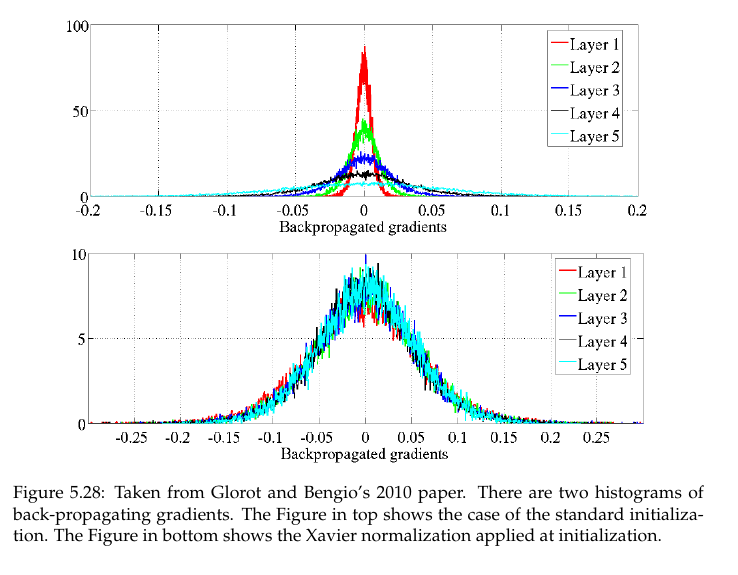

* Buscar otras alternativas. **Gated Cells**. Esto da lugar a la red llamada **LSTM**: Long Short Term Memory.

# LSTM
Por que puede sufrir el RNN del vanishing o exploding gradient?

Veamos un ejemplo. En la linea de procesar texto para predecir tenemos la siguiente frase larga.

" Henry ordena <font color='red'>burritos</font> cada vez que va a un restaurante. El debe amar la comida de <font color='red'>Mexicoi </font>"
El RNN quiere predecir la palabra Mexico pero solamente tiene un recursion de ordnen 6. Es decir predice cada seis palabras.

Se inventaron las LSTM. Estas las inventarion
Hochreiter and Schmidhuber en 1997.
Ellos dicen que pueden tener recursiones de orden 100 o mas, sin problemas de vanishing/exploding gradient.





Como funcionan (propagacion hacia adelante).

Un dibujo para explicar la nomenclatura y las convencioes.

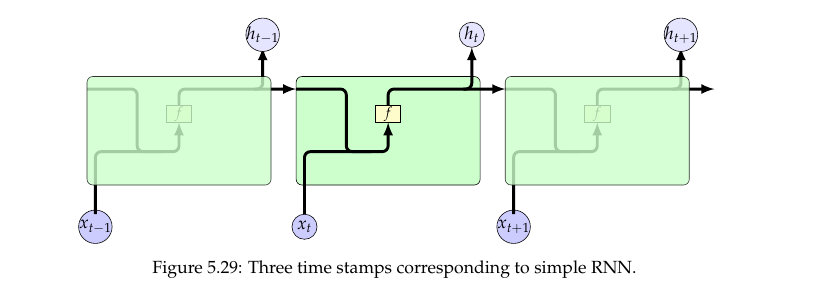

Quien seria $f$?
$$h_t = f(\Theta_x x_t + \Theta_h h_{t-1} + b) $$

La arquiectura del LSTM (es complicada) esta resumida en la siguiente grafica (la explico con detalle, esta es la clase de hoy)

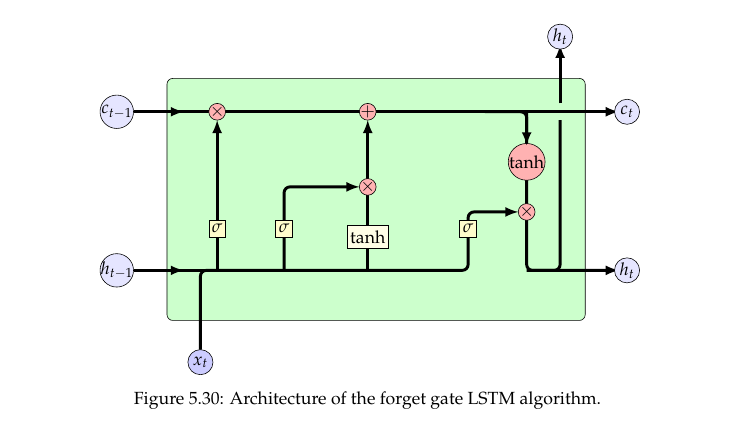

En esta figura hay tres **gates** (celdas). Las muestro en la siguiente figura.

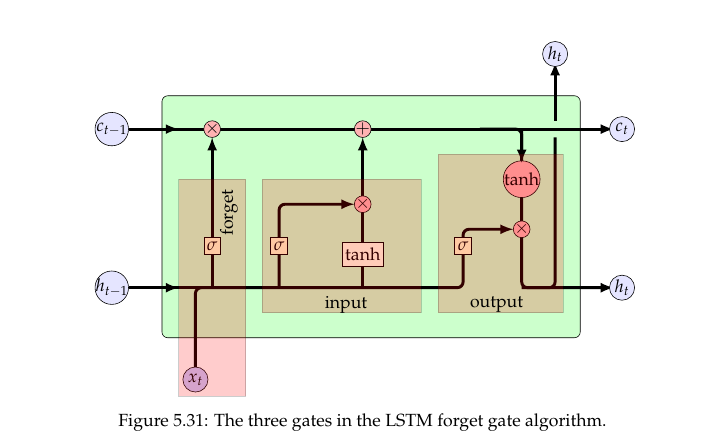

Las tres celdas son
1. **forget**
2. **input**
3. **output**

## Forget cell.
Corresponde a la figura anterior, la primera.


La **forget gate** tiene el siguiente modelo matematico

$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)  $$

## Input Cell:
La **input gate** se muestra en la siguiente figura.

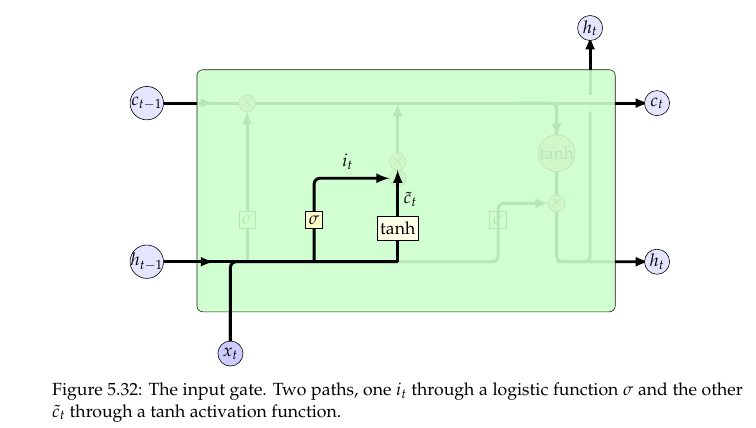

El modelo matematico para este "gate" es

$$i_t = \sigma(W_i x_t + U_t h_{t-1} + b_i) $$
$$\tilde{c}_t = \tanh( W_g x_t + U_g h_{t-1} + b_g) $$
El flujo $c_t$ lleva la memoria de termino largo.
El flujo $h_t$ lleva la memoria de termino corto.

En que espacio viven estos objetos?

$$W_i, W_g \in \mathbb{R}^{h \times d} $$
$$U_i, U_g \in \mathbb{R}^{h \times h} $$
$$b_i, b_g \in \mathbb{R}^{h} $$

## Calculo de la celta $c_t$.
Refierase a la siguiente figura



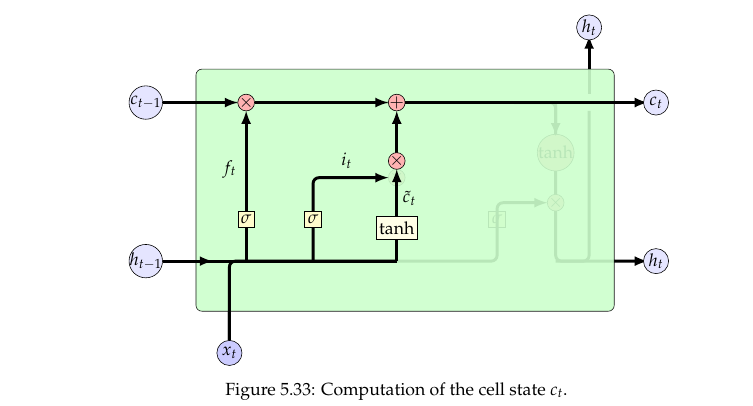

$$c_t = c_{t-1} \circ c_t + i_t \circ \tilde{c}_t $$

## output cell.
Refierase a la siguiente figura.

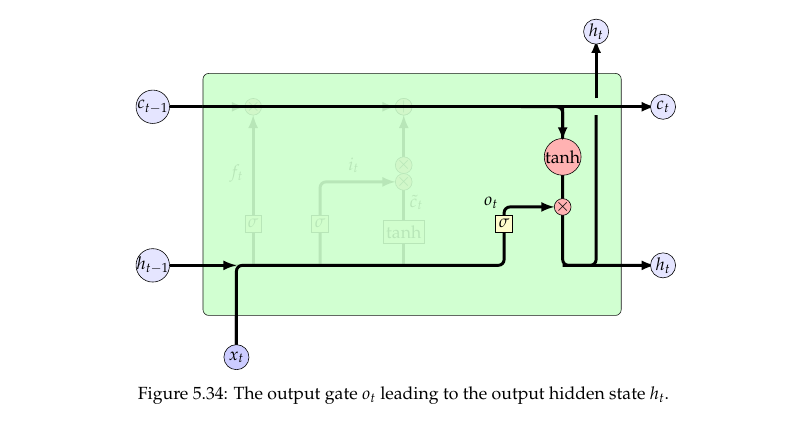

$$o_t = \sigma( W_0 x_t + U_0 h_{t-1} + b_o) $$
$$h_t = \tanh(c_{t-1}) \circ o_t$$

Donde
$$W_o \in \mathbb{R}^{h \times d} $$
$$U_o \in \mathbb{R}^{h \times h} $$
$$b_o \in \mathbb{R}^{h} $$
$$o_t \in \mathbb{R}^{h} $$
$$h_t \in \mathbb{R}^{h} $$


## Variantes de LSTM
### Peephole
$$f_t = \sigma(W_f x_t + U_f h_{t-1} + V_f c_{t-1} + b_f) $$
$$i_t = \sigma(W_i x_t + U_i h_{t-1} + V_i c_{t-1} + b_i) $$


Ver grafica abajo.




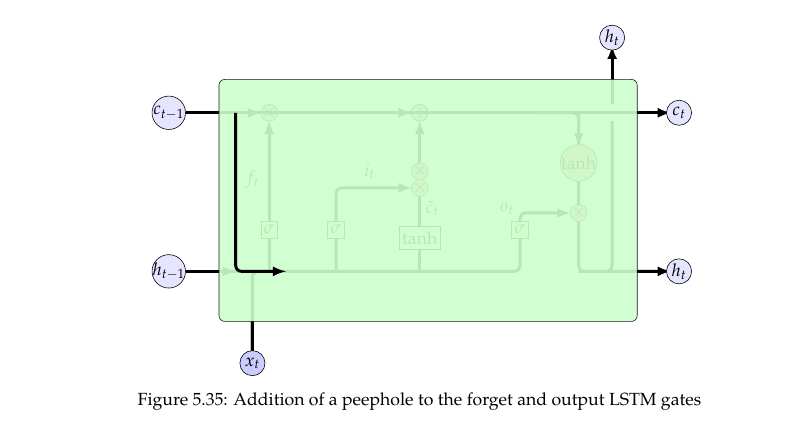

### Peephole convolutional
$$f_t = \sigma(W_f * x_t + U_f* h_{t-1} + V_f \circ c_{t-1} + b_f) $$
$$i_t = \sigma(W_i * x_t + U_i* h_{t-1} + V_i \circ c_{t-1} + b_i) $$
$$c_t = f_t \circ c_{t-1} + i_t \circ \tanh(W_c*x_t + U_c * h_{t-1} + b_c $$
$$o_t = \sigma(W_o * x_t + U_o* h_{t-1} + V_o \circ c_{t} + b_o) $$
$$h_t = o_t \circ \sigma_h(c_t) $$

